In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from datetime import timedelta
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv("../data/csv/Gold_Data.csv",index_col="Business_Week")
df = df.drop(df.columns[0],axis=1)
df = df.drop(df.columns[9],axis=1)
df = df.dropna(axis=1)
# Makes graphs easier to interpret and match up. This is unimportent for
# this model.
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)
df = df.reset_index(drop=True)
for i in range(len(df["Date"])):
    if df["Date"][i].weekday() != 1:
#         print(df["Date"][i])
        try:
            df.at[i,"Date"] = df["Date"][i-1]+timedelta(days=7)
#             print(df["Date"][i])
#             print(df["Date"][i].weekday())
        except:
            df.at[i,"Date"] = df["Date"][i+1]-timedelta(days=7)
# print(df.iloc[29,:])
df.set_index("Date",inplace=True)
df = df.asfreq("W-TUE")
df = df.dropna()

In [3]:
df.head()

,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Open Interest,Money Manager Shorts,Money Manager Longs,Producer/Merchant/Processor/User Longs,Producer/Merchant/Processor/User Shorts,Ten_Yr_Futures_Settle,Ten_Yr_Futures_Volume,Ten_Yr_Futures_Prev. Day Open Interest,USD_Change,USD_Settle,USD_Volume,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle
Date,,,,,,,,,,,,,,,,,
2006-06-13,602.80,324.800000,189517.8,382474.0,30916.0,103211.0,42587.0,128892.0,105.86250,34971.6,1935826.00,1.760,85.7620,7364.2,38753.4,0.0760,6.7790
2006-06-20,570.50,78.400000,191302.8,390281.0,30963.0,94632.0,47440.0,126992.0,105.01875,10278.8,2003874.80,0.013,86.2112,772.6,37679.6,0.1175,6.9283
2006-06-27,584.18,51.800000,189599.0,384321.0,32287.0,91042.0,48449.0,121890.0,104.33125,547949.0,2151127.00,0.340,86.0000,5056.2,23433.4,0.1715,7.4125
2006-07-04,594.40,31923.666667,297778.0,392868.0,30452.0,92545.0,48087.0,122568.0,104.53125,663508.5,2168869.75,-1.300,85.2640,2935.2,19682.8,-0.2920,7.1685
2006-07-11,634.00,43180.200000,253799.8,427008.0,27624.0,104213.0,54509.0,130618.0,104.71250,791971.0,2154420.80,0.230,85.0220,2823.0,19415.6,0.0960,7.1820


In [4]:
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_df,index=df.index,columns=df.columns)
normalized_df.head()

,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Open Interest,Money Manager Shorts,Money Manager Longs,Producer/Merchant/Processor/User Longs,Producer/Merchant/Processor/User Shorts,Ten_Yr_Futures_Settle,Ten_Yr_Futures_Volume,Ten_Yr_Futures_Prev. Day Open Interest,USD_Change,USD_Settle,USD_Volume,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle
Date,,,,,,,,,,,,,,,,,
2006-06-13,0.025239,0.000747,0.383462,0.000000,0.158664,0.181376,0.110468,0.206973,0.049919,0.008508,0.281443,0.787799,0.447752,0.078327,0.197709,0.459380,0.019160
2006-06-20,0.000000,0.000176,0.387091,0.011063,0.158911,0.148317,0.149656,0.200634,0.022412,0.001683,0.301270,0.531603,0.462115,0.001387,0.189336,0.476894,0.033710
2006-06-27,0.010690,0.000115,0.383627,0.002617,0.165892,0.134482,0.157804,0.183612,0.000000,0.150305,0.344174,0.579557,0.455362,0.051387,0.078247,0.499683,0.080899
2006-07-04,0.018676,0.073945,0.603558,0.014729,0.156217,0.140274,0.154881,0.185874,0.006520,0.182248,0.349343,0.339053,0.431829,0.026630,0.049000,0.304073,0.057119
2006-07-11,0.049619,0.100020,0.514149,0.063109,0.141308,0.185238,0.206740,0.212732,0.012429,0.217757,0.345133,0.563426,0.424091,0.025320,0.046916,0.467820,0.058435


# Loses ~ 4% R^2, but reduces number of features by almost half
Can prune models with little correlation/ability to predict the Settle Price.

In [5]:
influence = normalized_df.corr()
normalized_df = normalized_df[list(influence.loc[abs(influence["Gold_Settle"]) >= .3].index)]

In [15]:
normalized_df.head()

,Gold_Settle,Open Interest,Money Manager Longs,Producer/Merchant/Processor/User Longs,Producer/Merchant/Processor/User Shorts,Ten_Yr_Futures_Settle,USD_Volume,USD_Prev. Day Open Interest
Date,,,,,,,,
2006-06-13,0.025239,0.000000,0.181376,0.110468,0.206973,0.049919,0.078327,0.197709
2006-06-20,0.000000,0.011063,0.148317,0.149656,0.200634,0.022412,0.001387,0.189336
2006-06-27,0.010690,0.002617,0.134482,0.157804,0.183612,0.000000,0.051387,0.078247
2006-07-04,0.018676,0.014729,0.140274,0.154881,0.185874,0.006520,0.026630,0.049000
2006-07-11,0.049619,0.063109,0.185238,0.206740,0.212732,0.012429,0.025320,0.046916


In [6]:
X = normalized_df.drop("Gold_Settle", axis=1)
y = normalized_df["Gold_Settle"]

In [7]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=1)

In [8]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], "degree": [2,3,4],'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}]
testy = GridSearchCV(SVR(cache_size=2000),tuned_parameters)

In [9]:
testy.fit(X_train,y_train)

C:\Users\benel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=2000, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
print(testy.best_params_)
print(testy.best_score_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.8166848144328342


In [11]:
predictions = pd.DataFrame(testy.predict(X_test),index=X_test.index)

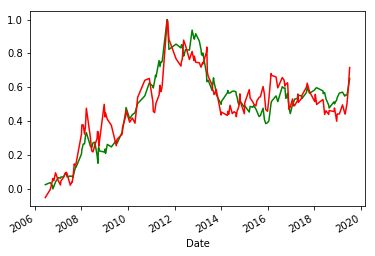

In [13]:
ax1 = y_test.plot(color="green")
ax2 = predictions[0].plot(color="red")

In [14]:
print(sqrt(mean_squared_error(y_test,predictions)))

0.0902582773832215
